# Figures for comparison of arrival direction and joint models

Here use the output from the `arrival_vs_joint` notebook to plot the figures shown in the paper.
<br>
<br>
*This code is used to produce Figures 6, 7 and 8 (left panel) in Capel & Mortlock (2019).* 

In [13]:
%matplotlib inline
import numpy as np
import h5py
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import DataFrame

from fancy import Data, Results
from fancy.plotting import Corner
from fancy.plotting.allskymap_cartopy import AllSkyMapCartopy as AllSkyMap
from fancy.plotting.colours import *

# to match paper style
plt.style.use('minimalist') 

In [14]:
# Define output files
source_type = "SBG_23"
detector_type = "TA2015"

sim_output_file = "../../output/{0}_sim_{1}_{2}_{3}_{4}_notightB.h5".format(
        "joint", source_type, detector_type, 19990308, "p")

## Figure 6

The simulated data set and the Auger exposure.

In [15]:
'''set detector and detector properties'''
if detector_type == "TA2015":
    from fancy.detector.TA2015 import detector_params, Eth
elif detector_type == "auger2014":
    from fancy.detector.auger2014 import detector_params, Eth
elif detector_type == "auger2010":
    from fancy.detector.auger2010 import detector_params, Eth
else:
    raise Exception("Undefined detector type!")

In [16]:
from astropy.coordinates import SkyCoord
from astropy import units as u

from fancy.detector.exposure import m_dec
from fancy.interfaces.stan import Direction

## Figure 7

Comparison of the joint and arrival direction fits.

In [17]:
seeds = [19990308, 16852056, 65492186, 9999999, 9953497]

F_gmf = []
F_joint = []
F_arrival = []

for seed in seeds:


    # joint_gmf_output_file = "../../output/{0}_fit_{5}_{1}_{2}_{3}_{4}_{6}.h5".format(
    #         "joint_gmf", "SBG_23", "TA2015", seed, "p", "sim", "joint_gmf")
    joint_output_file = "../../output/{0}_fit_{5}_{1}_{2}_{3}_{4}_{6}.h5".format(
            "joint", "SBG_23", "TA2015", seed, "p", "sim", "joint")
    arrival_output_file = "../../output/{0}_fit_{5}_{1}_{2}_{3}_{4}_{6}.h5".format(
        "arrival_direction", "SBG_23", "TA2015", seed, "p", "sim", "joint")

    # f_g = Results(joint_gmf_output_file).get_chain(['f'])['f']
    f_j = Results(joint_output_file).get_chain(['f'])['f']
    f_a = Results(arrival_output_file).get_chain(['f'])['f']

    # F_gmf.append(f_g)
    F_joint.append(f_j)
    F_arrival.append(f_a)

# f_gmf_avg = np.mean(np.array(F_gmf), axis=0)
f_joint_avg = np.mean(np.array(F_joint), axis=0)
f_arrival_avg = np.mean(np.array(F_arrival), axis=0)

f_true = Results(sim_output_file).get_truths(['f'])['f']

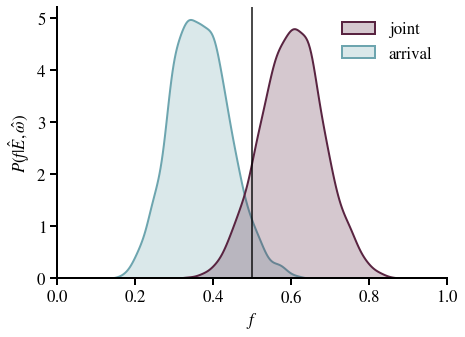

In [18]:
fig, ax = plt.subplots()
# fig.set_size_inches((6, 4))

# sns.distplot(f_gmf_avg, hist = False, 
#              kde_kws = {'shade' : True, 'lw' : 2, 'zorder' : 0}, 
#              color = grey, label = 'joint + gmf')
sns.distplot(f_joint_avg, hist = False, 
             kde_kws = {'shade' : True, 'lw' : 2, 'zorder' : 1}, 
             color = purple, label = 'joint')
sns.distplot(f_arrival_avg, hist = False, 
             kde_kws = {'shade' : True, 'lw' : 2, 'zorder' : 0}, 
             color = lightblue, label = 'arrival')
ax.axvline(f_true, 0, 10, color = 'k', zorder = 3, lw = 2., alpha = 0.7)

ax.set_xlim(0, 1)
# ax.set_ylim(0, 10)
ax.set_xlabel('$f$')
ax.set_ylabel('$P(f | \hat{E}, \hat{\omega})$')
ax.legend(loc="best")
fig.savefig("dist_sims_cumul.png", bbox_inches="tight")

## Figure 8 (left panel)

In [7]:

keys = ['F0', 'L', 'alpha', 'B', 'f']
chain_list = []
for seed in seeds:


    joint_gmf_output_file = "../../output/{0}_fit_{5}_{1}_{2}_{3}_{4}_{6}.h5".format(
            "joint_gmf", "SBG_23", "TA2015", seed, "p", "sim", "joint_gmf")
#     joint_output_file = "../../output/{0}_fit_{5}_{1}_{2}_{3}_{4}.h5".format(
#             "joint", "SBG_23", "TA2015", seed, "p", "sim")

    chain = Results(joint_gmf_output_file).get_chain(keys)

    # Convert form Stan units to plot units
    chain['F0'] = chain['F0'] / 1.0e3 # km^-2 yr^-1
    chain['L'] = chain['L'] * 10 # 10^-38 yr^-1

    chain_list.append(chain)

chain_avgs = {key:0 for key in keys}

for key in keys:
    chain_sum = 0
    for i in range(len(seeds)):
        chain_sum += chain_list[i][key]

    chain_sum /= len(seeds)

    chain_avgs[key] = chain_sum

In [8]:
chain_avgs

{'F0': array([0.04046954, 0.03063004, 0.0362236 , ..., 0.03777035, 0.04527976,
        0.03653704]),
 'L': array([6.53991106, 7.76818002, 9.56199162, ..., 6.77003585, 5.85887225,
        6.09559627]),
 'alpha': array([3.30845034, 3.23381574, 3.36275751, ..., 3.5561464 , 3.50921405,
        3.46865076]),
 'B': array([13.32515147, 16.13295902, 19.66238293, ..., 17.11267206,
        15.48473286, 11.71386348]),
 'f': array([0.45303019, 0.563345  , 0.5755513 , ..., 0.48128513, 0.40389855,
        0.45840481])}

In [10]:
# Get chains from joint fit and truths from simulation
results_sim = Results(sim_output_file)
# results_fit = Results(joint_gmf_output_file)

# keys = ['F0', 'L', 'alpha', 'B', 'f']
# chain = results_fit.get_chain(keys)

# # Convert form Stan units to plot units
# chain['F0'] = chain['F0'] / 1.0e3 # km^-2 yr^-1
# chain['L'] = chain['L'] * 10 # 10^-38 yr^-1

truth_keys = ['F0', 'L', 'alpha', 'B', 'f']
truth = results_sim.get_truths(truth_keys)
info_keys = ['Eth', 'Eth_sim']
info = results_sim.get_truths(info_keys)

# Correct for different Eth in sim and fit
# Also scale to plot units
flux_scale = (info['Eth'] / info['Eth_sim'])**(1 - truth['alpha'])
truth['F0'] = truth['F0'] * flux_scale # km^-2 yr^-1
truth['L'] = truth['L'][0] * flux_scale / 1.0e39 * 10 # 10^-38 yr^-1

In [11]:
labels = {}
labels['L'] = r'$L$ / $10^{38}$ $\mathrm{yr}^{-1}$'
labels['F0'] = r'$F_0$ / $\mathrm{km}^{-2} \ \mathrm{yr}^{-1}$'
labels['B'] = r'$B$ / $\mathrm{nG}$'
labels['alpha'] = r'$\alpha$'
labels['f'] = r'$f$' 

In [12]:
params = np.column_stack([chain_avgs[key] for key in keys])
truths = [truth[key] for key in keys]

# Make nicely labelled dict
chain_for_df = {}
for key in keys:
    chain_for_df[labels[key]] = chain_avgs[key]

# Make ordered dataframe
df = DataFrame(data = chain_for_df)
df = df[[labels['F0'], labels['L'], labels['alpha'], labels['B'], labels['f']]]

In [13]:

corner = Corner(df, truths, color=purple, contour_color=purple_contour) 
corner.save("corner_sims_cumul.png")

### Footnote

In the paper I made a small typo in the plot labelling, $F_0$ is indeed in units of $\rm{km}^{-2} \ yr^{-1}$. Also, there are some small differences in the fit posteriors due to the use of a random seed. 